# Haberman's Data set

### objective

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#load haberman.csv

haberman = pd.read_csv("haberman.csv")
print(haberman.head(5))

#identify howmany data points present for each class
print("No of data points for haberman")
print(haberman.shape)
#data points present for each class
print("No of data points for each class in haberman")
haberman["status"].value_counts()

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1
No of data points for haberman
(306, 4)
No of data points for each class in haberman


1    225
2     81
Name: status, dtype: int64

# High level statistics of the dataset

# Univaraite analysis

## PDF

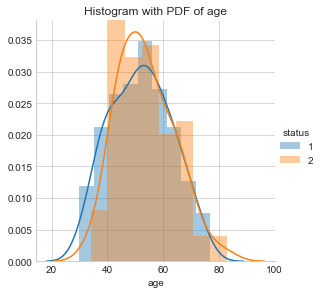

In [40]:
sns.FacetGrid(haberman, hue = "status", size =4).map(sns.distplot,"age") \
.add_legend();
plt.title("Histogram with PDF of age")
plt.show();

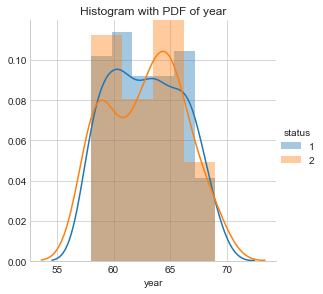

In [41]:
sns.FacetGrid(haberman, hue = "status", size = 4).map(sns.distplot, "year").add_legend();
plt.title("Histogram with PDF of year")
plt.show();

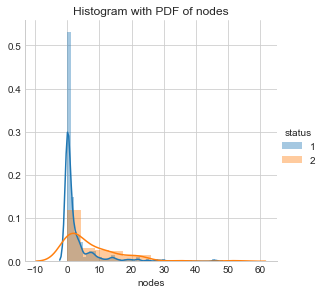

In [42]:
sns.FacetGrid(haberman, hue = "status", size = 4).map(sns.distplot, "nodes").add_legend();
plt.title("Histogram with PDF of nodes")
plt.show();

## CDF

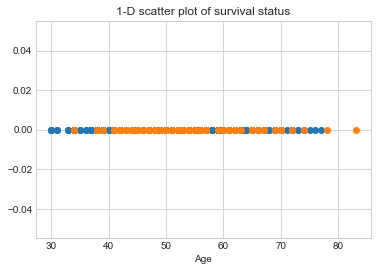

In [43]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
haberman_Longer_5Years = haberman.loc[haberman["status"] == 1]
haberman_Less_5_Years = haberman.loc[haberman["status"] == 2]
plt.title("1-D scatter plot of survival status")
plt.xlabel('Age')
plt.plot(haberman_Longer_5Years["age"], np.zeros_like(haberman_Longer_5Years["age"]), 'o')
plt.plot(haberman_Less_5_Years["age"], np.zeros_like(haberman_Less_5_Years["age"]), 'o')


[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


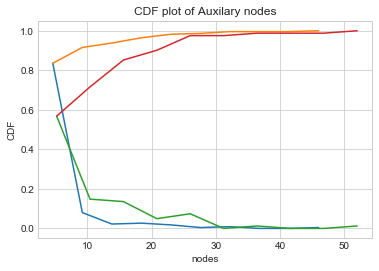

In [44]:
#plotting cdf for status "1 - Longer than 5 year of survival"
counts, bin_edges = np.histogram(haberman_Longer_5Years['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)

#plotting cdf for status "2 - less than 5 year of survival"
counts, bin_edges = np.histogram(haberman_Less_5_Years['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:],cdf)
plt.title("CDF plot of Auxilary nodes")
plt.xlabel('nodes')
plt.ylabel('CDF')
plt.show();

## Boxplot

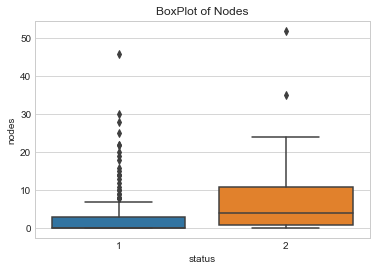

In [45]:
sns.boxplot(x='status',y='nodes',data=haberman)
plt.title('BoxPlot of Nodes')
plt.show()

## voilinplot

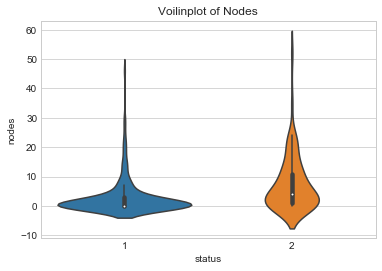

In [46]:
sns.violinplot(x='status', y='nodes',data=haberman,size=8)
plt.title('Voilinplot of Nodes')
plt.show()

# Bi-variate analysis

## Scatter plot

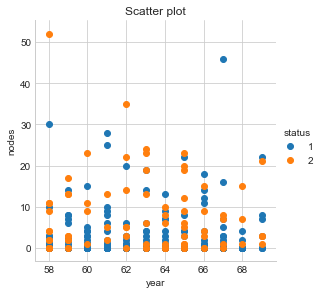

In [47]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman,hue="status", size=4).map(plt.scatter, "year","nodes").add_legend();
plt.title('Scatter plot')
plt.show();

## Pair-plots

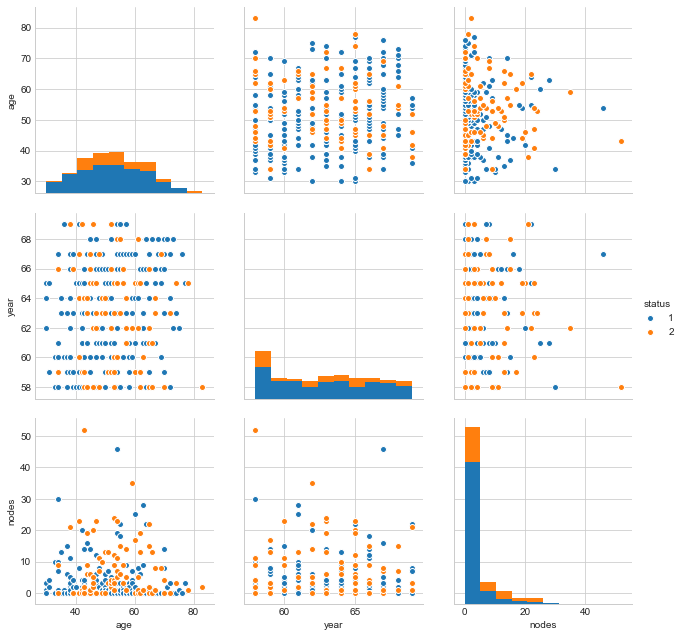

In [48]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue= "status", vars = ["age", "year", "nodes"],size = 3);
plt.show()

### Conclusion

###### Calculating Mean, Variance, Std-deviation 

In [49]:
print ("Mean:")
print (np.mean(haberman_Longer_5Years['status']))
print (np.mean(haberman_Less_5_Years['status']))
print ("\nStd-deviation:");
print (np.std(haberman_Longer_5Years['status']))
print (np.std(haberman_Less_5_Years['status']))

Mean:
1.0
2.0

Std-deviation:
0.0
0.0


In [50]:
print("\nMedians:")
print(np.median(haberman_Longer_5Years['status']))
print(np.median(haberman_Less_5_Years['status']))

print("\nQuantiles:")
print(np.percentile(haberman_Longer_5Years['status'],np.arange(0, 100, 25)))
print(np.percentile(haberman_Less_5_Years['status'],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_Longer_5Years['status'],90))
print(np.percentile(haberman_Less_5_Years['status'],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation:")
print(robust.mad(haberman_Longer_5Years['status']))
print(robust.mad(haberman_Less_5_Years['status']))


Medians:
1.0
2.0

Quantiles:
[1. 1. 1. 1.]
[2. 2. 2. 2.]

90th Percentiles:
1.0
2.0

Median Absolute Deviation:
0.0
0.0
